In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/games.csv", parse_dates=["date"])
df = df.dropna()

Notes
* Only 3 different outcomes
* Dropping NAs leaves 2,120 rows (12 dropped)
* 1,026 games had a winner
* White won 640 games, black 386 and 1,094 were drawn (so 51.6% of games are drawn)
* 721/1,026 (~70%) of the games with a winner were won by the player with the higher elo

In [3]:
df["white_score"] = df["result"].apply(lambda x: float(x.split("-")[0][0]))
df["black_score"] = df["result"].apply(lambda x: x.split("-")[1][0])

In [4]:
def get_result_integer(string_result, position):
    return float(string_result.split("-")[position][0])

In [5]:
def get_result_non_integer(string_result, position):
    res = [x.split("/") if "/" in x else x for x in string_result.split("-")]
    res = [i for s in res for i in s]
    if position == 0:
        return float(res[0]) / float(res[1])
    elif position == 1:
        return float(res[2]) / float(res[3])
    else:
        raise Exception("Argh")

In [6]:
df["white_score"] = df["result"].apply(
    lambda x: get_result_integer(x, 0)
    if "/" not in x
    else get_result_non_integer(x, 0)
)
df["black_score"] = df["result"].apply(
    lambda x: get_result_integer(x, 1)
    if "/" not in x
    else get_result_non_integer(x, 1)
)

In [31]:
white_win = df["white_score"] > df["black_score"]
black_win = df["white_score"] < df["black_score"]
draw = df["white_score"] == df["black_score"]
df["outcome"] = 0
df.loc[white_win, "outcome"] = "white"
df.loc[black_win, "outcome"] = "black"
df.loc[draw, "outcome"] = "draw"

In [32]:
white_elo_higher = df["white_elo"] > df["black_elo"]
black_elo_higher = df["white_elo"] < df["black_elo"]
same_elo = df["white_elo"] == df["black_elo"]
df["stronger_player"] = 0
df.loc[white_elo_higher, "stronger_player"] = "white"
df.loc[black_elo_higher, "stronger_player"] = "black"
df.loc[same_elo, "stronger_player"] = "equal"

df["white_least_as_strong"] = 0
df.loc[white_elo_higher | same_elo, "white_least_as_string"] = 1
df.loc[black_elo_higher, "white_least_as_string"] = 0

In [33]:
df["white_black_elo_diff"] = df["white_elo"] - df["black_elo"]

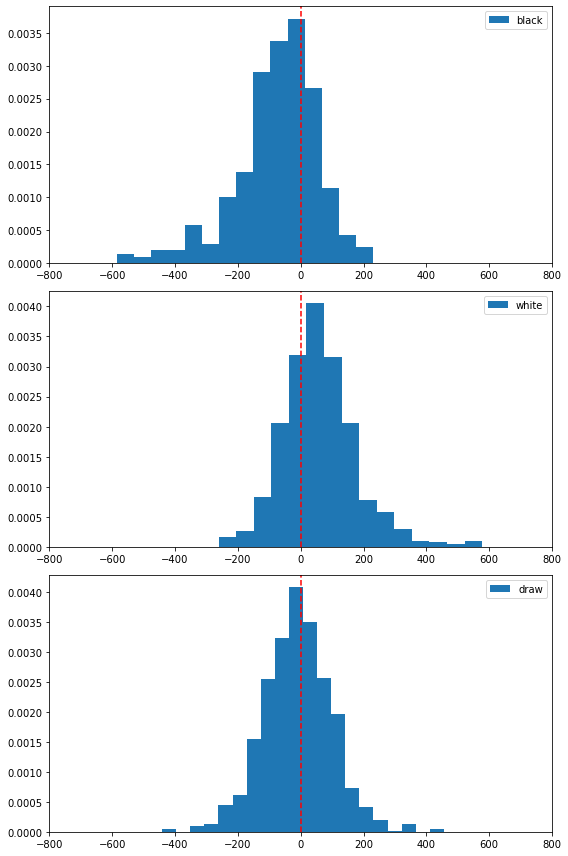

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
ax = ax.ravel()
for i, outcome in enumerate(df["outcome"].unique()):
    plot_df = df.loc[df["outcome"] == outcome, "white_black_elo_diff"]
    ax[i].hist(plot_df.values, label=outcome, bins=20, density=True)
    ax[i].set_xlim(-800, 800)
    ax[i].legend()
    ax[i].axvline(x=0, color="red", linestyle="--")
plt.tight_layout();